In [197]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [198]:
main_data = pd.read_csv('temp_mean_data/merged_files.csv')
only_temp = main_data['temperature(k)']
main_data


,date,temperature(k)
0,1981-01-01,273.830
1,1981-01-02,274.172
2,1981-01-03,273.739
3,1981-01-04,273.635
4,1981-01-05,272.250
...,...,...
12037,2013-12-26,272.592
12038,2013-12-27,272.947
12039,2013-12-28,271.847
12040,2013-12-29,271.631


In [199]:
data = []

for x in only_temp:
    data.append(x - 273.15)

In [200]:
temp_in_celsius = pd.DataFrame(data,columns={'temp(C)'})
temp_in_celsius


,temp(C)
0,0.680
1,1.022
2,0.589
3,0.485
4,-0.900
...,...
12037,-0.558
12038,-0.203
12039,-1.303
12040,-1.519


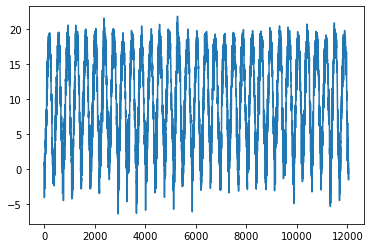

In [201]:
plt.plot(temp_in_celsius)

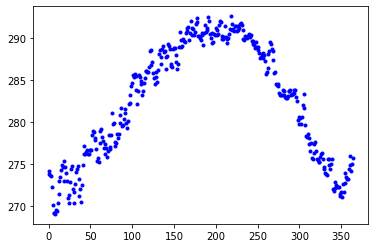

In [202]:
plt.plot(only_temp.head(365),'b.')

In [203]:
# main_data['date'] = pd.to_datetime(main_data['date'])
y_plot = main_data['temperature(k)'].head(365)
# x_plot = main_data['date'].head(365)
y_model = main_data[['temperature(k)']].head(365)
# x_model = main_data[['date']].head(365)
My_list = range(0, 365)
x = pd.DataFrame(My_list)

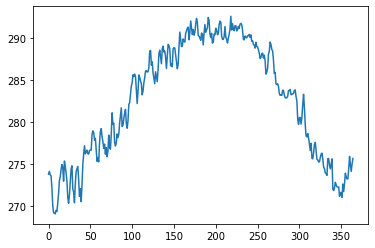

In [204]:
plt.plot(x[0],y_plot)

In [205]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(x_model,y_model,test_size=0.2)

In [206]:
# Applying linear regression
lr = LinearRegression()

In [207]:
lr.fit(X_train,y_train)

LinearRegression()

In [208]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)

In [209]:
accuracy = r2_score(y_test,y_pred)
print("%.2f" % (accuracy*100)+"% accuracy")

4.22% accuracy


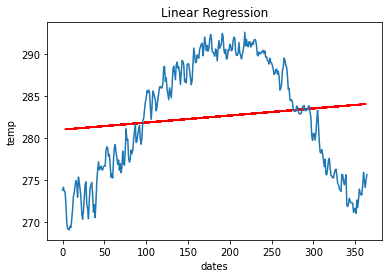

In [210]:
plt.plot(X_test[0],y_pred,color='r')
plt.plot(x[0],y_plot)
plt.xlabel('dates')
plt.ylabel('temp')
plt.title('Linear Regression')
plt.show()



In [211]:
# Applying polynomial linear regression
# degree = 2
poly = PolynomialFeatures(degree=2)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

In [212]:
print(X_train[0])
X_train_trans[0]

347    347
177    177
179    179
280    280
31      31
      ... 
246    246
294    294
364    364
292    292
1        1
Name: 0, Length: 292, dtype: int64


array([1.00000e+00, 3.47000e+02, 1.20409e+05])

In [213]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [214]:
y_pred_trans = lr.predict(X_test_trans)

In [215]:
accuracy_poly = r2_score(y_test,y_pred_trans)
print("%.2f" % (accuracy_poly*100)+"% accuracy")

88.98% accuracy
